In [ ]:
import kagglehub

# Download the latest version of the dataset
path = kagglehub.dataset_download("patricklford/global-co-emissions")

# Print the path to the downloaded dataset
print("Dataset downloaded to:", path)


100%|██████████| 336/336 [00:00<00:00, 101kB/s]

Extracting files...
Dataset downloaded to: /root/.cache/kagglehub/datasets/patricklford/global-co-emissions/versions/1


In [ ]:
import pandas as pd
import os

# Construct the full path to the CSV file
csv_file_path = os.path.join(path, 'GlobalCO2Emissions.csv')

# Load the dataset into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Get a summary of the dataset
print(df.describe())



   Year  Emissions
0  1750       0.03
1  1760       0.03
2  1770       0.03
3  1780       0.03
4  1790       0.04
Year         0
Emissions    0
dtype: int64
              Year  Emissions
count    29.000000  29.000000
mean   1889.827586   5.937586
std      84.855368  11.443084
min    1750.000000   0.030000
25%    1820.000000   0.060000
50%    1890.000000   0.430000
75%    1960.000000   3.740000
max    2023.000000  40.900000


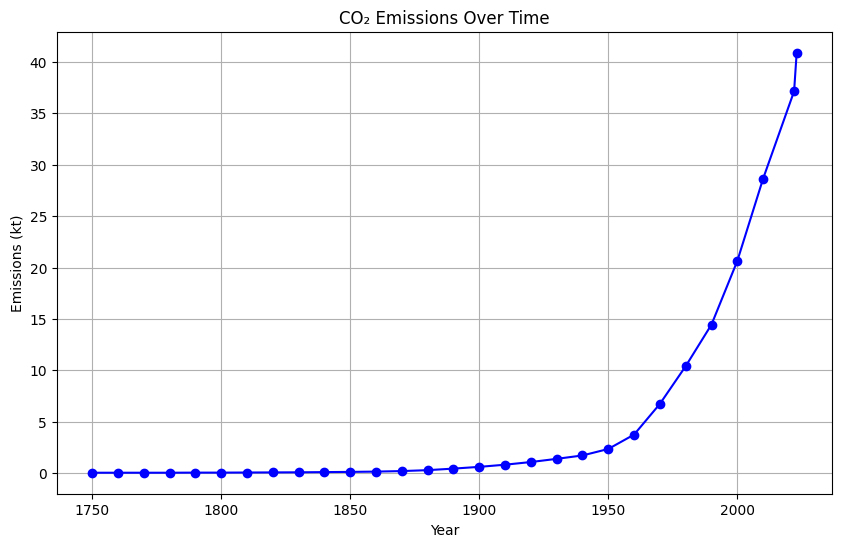

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Emissions'], marker='o', linestyle='-', color='b')
plt.title('CO₂ Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Emissions (kt)')
plt.grid(True)
plt.show()



In [ ]:
# Calculate the annual growth rate of CO₂ emissions
df['Growth_Rate'] = df['Emissions'].pct_change() * 100

# Display the growth rate
print(df[['Year', 'Growth_Rate']].dropna())



    Year  Growth_Rate
1   1760     0.000000
2   1770     0.000000
3   1780     0.000000
4   1790    33.333333
5   1800     0.000000
6   1810    25.000000
7   1820    20.000000
8   1830    16.666667
9   1840    28.571429
10  1850    22.222222
11  1860    27.272727
12  1870    35.714286
13  1880    47.368421
14  1890    53.571429
15  1900    39.534884
16  1910    35.000000
17  1920    32.098765
18  1930    28.971963
19  1940    23.913043
20  1950    36.842105
21  1960    59.829060
22  1970    79.946524
23  1980    54.531947
24  1990    38.942308
25  2000    42.837370
26  2010    38.808140
27  2022    29.668412
28  2023    10.094213


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Reshape the data for modeling
X = df['Year'].values.reshape(-1, 1)
y = df['Emissions'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')



Mean Squared Error: 82.89406089943384
R² Score: 0.5428721778821507


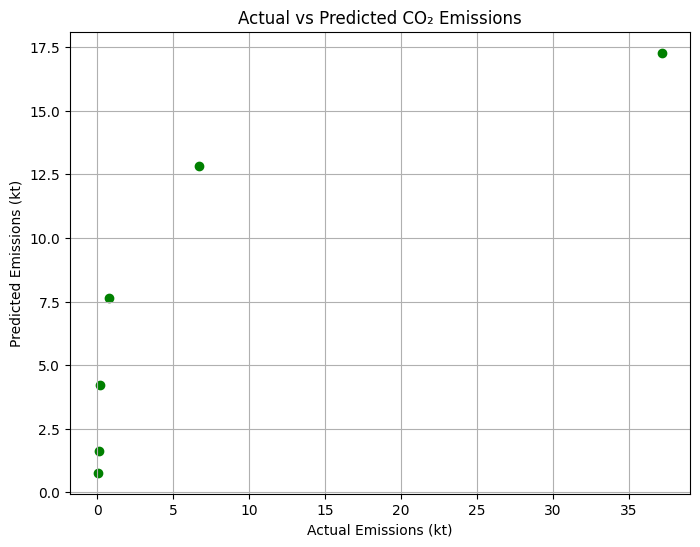

In [ ]:
# Scatter plot of actual vs predicted CO₂ emissions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='g')
plt.title('Actual vs Predicted CO₂ Emissions')
plt.xlabel('Actual Emissions (kt)')
plt.ylabel('Predicted Emissions (kt)')
plt.grid(True)
plt.show()




In [ ]:
import numpy as np
#  Predict future CO2 emissions for the next 10 years
last_year = df['Year'].max()
future_years = np.arange(last_year + 1, last_year + 11).reshape(-1, 1)  # next 10 years

# Predict emissions for future years
future_predictions = model.predict(future_years)

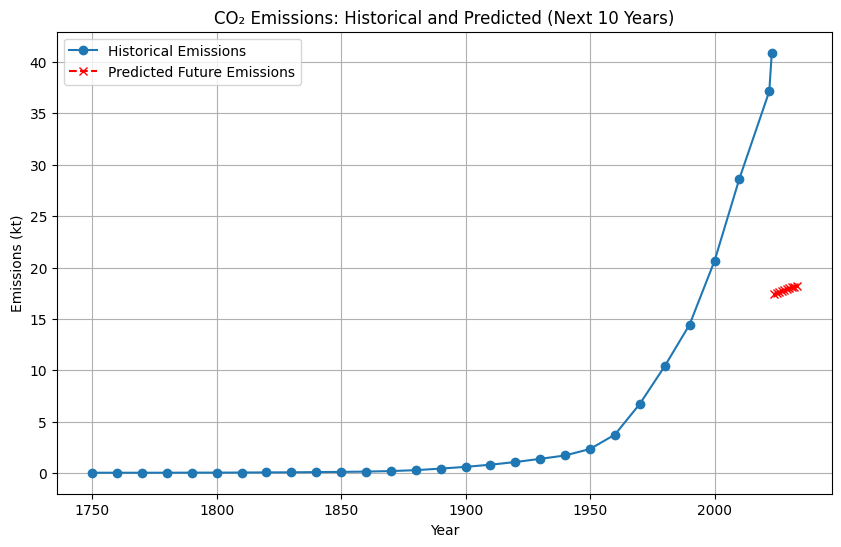

In [ ]:
# Plot historical + future emissions
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Emissions'], marker='o', linestyle='-', label='Historical Emissions')
plt.plot(future_years, future_predictions, marker='x', linestyle='--', color='r', label='Predicted Future Emissions')
plt.title('CO₂ Emissions: Historical and Predicted (Next 10 Years)')
plt.xlabel('Year')
plt.ylabel('Emissions (kt)')
plt.legend()
plt.grid(True)
plt.show()
